# Analisis Univariado

A continuación se procederá a examinar cada variable de forma individual con el objetivo de entender su distribución, medidas centrales y de dispersión. Para complementar el análisis utilizaremos tablas estadísticas y gráficas según se considere adecuado.

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Carga del dataset y construcción del dataframe de trabajo
datos = pd.read_csv("/Users/pctm/Downloads/data_payments.csv")

df = datos.rename(columns={
    'KEY': 'ID',
    'REF_AREA': 'COUNTRY_ORIGIN',
    'COUNT_AREA': 'COUNTRY_DESTINATION',
    'TYP_TRNSCTN': 'TYPE_TRX',
    'RL_TRNSCTN': 'TYPE_PSP',
    'FRD_TYP': 'TYPE_FRAUD',
    'UNIT_MEASURE': 'UNIT_',   
    'TIME_PERIOD': 'YEAR',
    'OBS_VALUE': 'AMOUNT',
    'OBS_STATUS': 'TYPE_AMOUNT',
    'TITLE': 'DESCRIPTION'
})

df = df[[  
    'ID','FREQ','COUNTRY_ORIGIN','COUNTRY_DESTINATION',
    'TYPE_TRX','TYPE_PSP','TYPE_FRAUD',  'UNIT_',
    'YEAR','AMOUNT','TYPE_AMOUNT','DECIMALS',
    'DESCRIPTION','UNIT_MULT'
]]

df.head()



,ID,FREQ,COUNTRY_ORIGIN,COUNTRY_DESTINATION,TYPE_TRX,TYPE_PSP,TYPE_FRAUD,UNIT_,YEAR,AMOUNT,TYPE_AMOUNT,DECIMALS,DESCRIPTION,UNIT_MULT
0,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2014,0.242,A,3,"Total payment transactions, incl. cash withdra...",6
1,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2015,0.268,A,3,"Total payment transactions, incl. cash withdra...",6
2,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2016,0.689,A,3,"Total payment transactions, incl. cash withdra...",6
3,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2017,0.632,A,3,"Total payment transactions, incl. cash withdra...",6
4,PAY.A.AT.BG.TOTL.1._Z.N.PN,A,AT,BG,TOTL,1,_Z,PN,2018,0.615,A,3,"Total payment transactions, incl. cash withdra...",6


## Target Variable: TYPE_FRAUD

#### Tabla

In [ ]:
# Tabla de frecuencias de TYPE_FRAUD
tabla_y = (
    df['TYPE_FRAUD']
    .value_counts()
    .reset_index()
    .rename(columns={'TYPE_FRAUD': 'TYPE_FRAUD', 'count': 'Fraude'})
)
tabla_y['Porcentaje'] = (tabla_y['Fraude'] / tabla_y['Fraude'].sum() * 100).round(1)

tabla_y

,TYPE_FRAUD,Fraude,Porcentaje
0,_Z,660672,99.7
1,F,1944,0.3


La variable **TYPE_FRAUD** representa la clasificación del fraude indentificado en una transacción. Del total de observaciones, 660.672 no están relacionadas a un caso de fraude, mientras que 1944 transacciones fueron marcadas como movimientos fraudulentos. Debido al alto desequilibrio entre las observaciones legales y las transacciones fraudulentas se debe tener mucha precaución a la hora de construir el modelo de predicción.

#### Gráfico

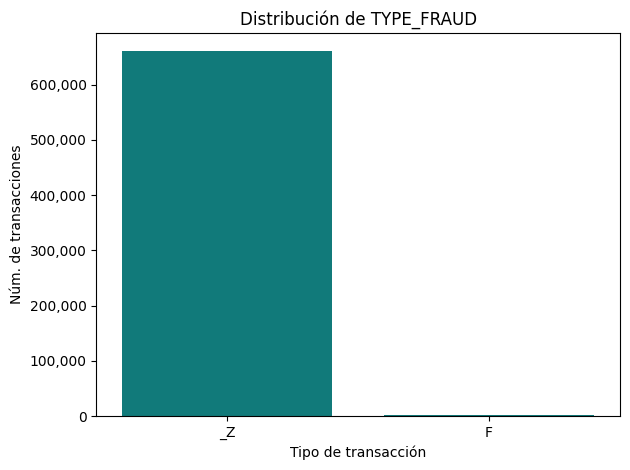

In [ ]:
# Gráfico de TYPE_FRAUD
sns.countplot(x='TYPE_FRAUD', data=df, color='#008B8B')

plt.title('Distribución de TYPE_FRAUD')
plt.xlabel('Tipo de transacción')
plt.ylabel('Núm. de transacciones')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

Este gráfico muestra la distribución del tipo de transacción, confirmando que la mayoria de transacciones observadas no fueron marcadas como fraude. Puntualmente el 99.7% de las transacciones fueron consideradas legales, mientras que el 0.3% fueron asociadas con algún comportamiento irregular. Esta notable diferencia indica un alto desbalance en las clases de la variable objetivo, lo cual es importante destacar al momento de construir modelos predictivos.

## Variables Características Categóricas

A continuación se examinarán detenidamente cada una de las variables.

### ID

Clave compuesta identificadora de las caracteristicas generales de una transacción. No es única.

In [ ]:
# Tabla de frecuencias de ID
tabla_ID = (
    df['ID']
    .value_counts()
    .reset_index()
    .rename(columns={'ID': 'Categoria', 'count': 'Frecuencia'})
)

tabla_ID.head()

,Categoria,Frecuencia
0,PAY.A.CY.W0.SER.1._Z.N.PN_R_TT,25
1,PAY.A.ES.W0.CP0.1._Z.N.EUR_R_POP,25
2,PAY.A.AT.W0.CP0.1._Z.N.PN,25
3,PAY.A.CZ.W0.CT0.1._Z.N.EUR_R_TT,25
4,PAY.A.RO.W0.CHQ.2._Z.G1.XDF,25


Como se ve en la tabla, la columna **KEY** corresponde a una clave compuesta por las prinicpales caracteristicas de transacción como el tipo de monto, la unidad, tipo de fraude, etc.

### FREQ

Describe la recurrencia con la que se realiza determinado pago (Anual, trimestral, semestral, etc.). Se categoriza en:

**- A:** Transacciones anuales

**- H:** Transacciones semestrales

**- Q:** Transacciones trimestrales

#### Tabla

In [ ]:
# Tabla de frecuencias de FREQ
tabla_freq = (
    df['FREQ']
    .value_counts()
    .reset_index()
    .rename(columns={'FREQ': 'Categoria', 'count': 'Frecuencia'})
)
tabla_freq['Porcentaje'] = (tabla_freq['Frecuencia'] / tabla_freq['Frecuencia'].sum() * 100).round(2)

tabla_freq

,Categoria,Frecuencia,Porcentaje
0,A,275179,41.53
1,H,236884,35.75
2,Q,150553,22.72


#### Gráfico

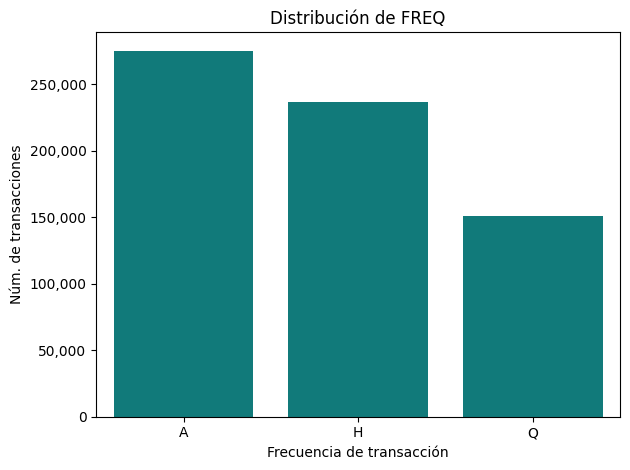

In [ ]:
# Gráfico de FREQ
sns.countplot(x='FREQ', data=df, color='#008B8B')

plt.title('Distribución de FREQ')
plt.xlabel('Frecuencia de transacción')
plt.ylabel('Núm. de transacciones')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **FREQ** del dataset, que permite caracterizar la recurrencia habitual de las transacciones. Las transacciones anuales (A) representan un 41.53% del total, mientras que la frecuencia semestral (H) y trimestral (Q) agrupan un 35.75% y 22.72%, cada una. En números exactos esto es 275.179, 236.884 y 150.553 transacciones respectivamente.

### COUNTRY_ORIGIN

Presenta el código del país origen del movimiento bancario.

#### Tabla

In [ ]:
# Lookup de nombres de países de origen
lookup = pd.DataFrame({
    'Categoria': ['RO','HU','PL','CZ','NL','PT','LT','DE','FI','LU','GR','BE','ES','LV','IT','AT','FR','IE','CY','EE','SK','SI','MT','BG','HR','DK','U2','B0','SE'],
    'NombrePais': ['Romania','Hungary','Poland','Czech Republic','Netherlands','Portugal','Lithuania','Germany','Finland','Luxembourg','Greece','Belgium','Spain','Latvia','Italy','Austria','France','Ireland','Cyprus','Estonia','Slovakia','Slovenia','Malta','Bulgaria','Croatia','Denmark','Euro Area changing composition','EU changing composition','Sweden']
})

tabla_country = (
    df['COUNTRY_ORIGIN']
    .value_counts()
    .reset_index()
    .rename(columns={'COUNTRY_ORIGIN': 'Categoria', 'count': 'Frecuencia'})
)
tabla_country['Porcentaje'] = (tabla_country['Frecuencia'] / tabla_country['Frecuencia'].sum() * 100).round(2)
tabla_country = tabla_country.merge(lookup, on='Categoria', how='left')

tabla_country

,Categoria,Frecuencia,Porcentaje,NombrePais
0,RO,28816,4.35,Romania
1,HU,28794,4.35,Hungary
2,PL,28267,4.27,Poland
3,CZ,28133,4.25,Czech Republic
4,NL,27274,4.12,Netherlands
5,PT,25672,3.87,Portugal
6,LT,25590,3.86,Lithuania
7,DE,25219,3.81,Germany
8,FI,25162,3.80,Finland
9,LU,25156,3.80,Luxembourg


#### Gráfico

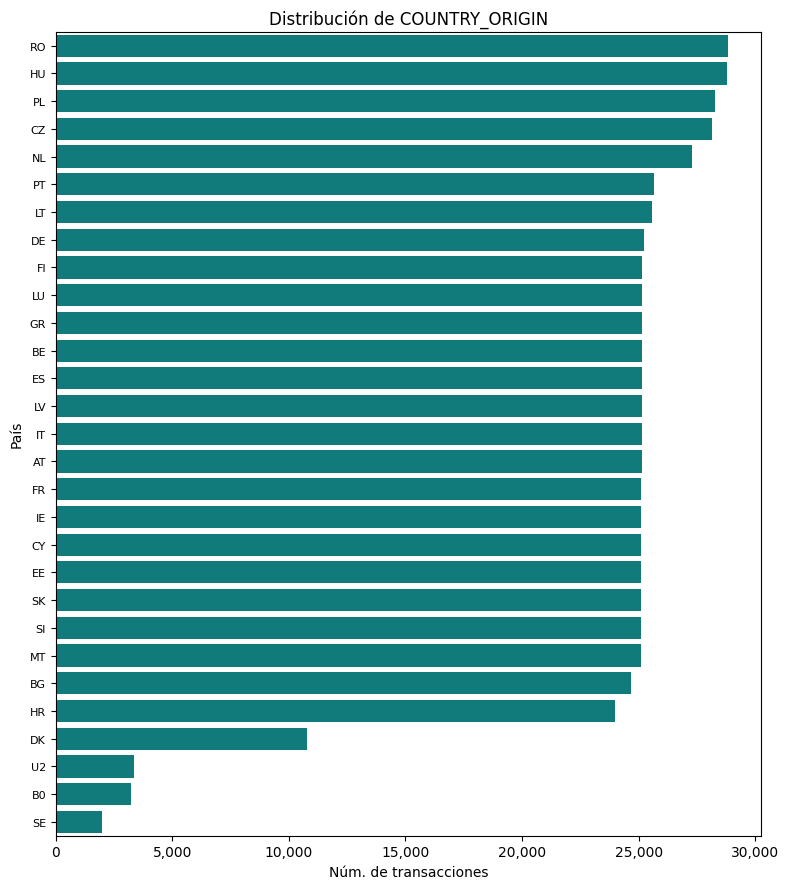

In [ ]:
# Gráfico de COUNTRY_ORIGIN (orden descendente por frecuencia)
orden_country = df['COUNTRY_ORIGIN'].value_counts().index

plt.figure(figsize=(8, 9))
sns.countplot(y='COUNTRY_ORIGIN', data=df, order=orden_country, color='#008B8B')

plt.title('Distribución de COUNTRY_ORIGIN')
plt.xlabel('Núm. de transacciones')
plt.ylabel('País')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tick_params(axis='y', labelsize=8)
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **COUNTRY_ORIGIN** del dataset, que permite caracterizar el origen de las transacciones. A simple vista se puede notar que los países tienen frecuencias muy similares, no hay único país que destaque de forma dominante frente a los demás. Romania, Hungría, Polonia, República Checa y Paises bajos son los 5 territorios con el porcentaje de origen más alto superior al 4% cada uno. Por otro lado, encontramos entidades especiales como la "Euro Area changing composition" y "EU changing composition" que presentan una baja frecuencia frente a otros mercados (menos del 1%).

> **Euro Area changing composition/EU changing composition**: hace referencia a países que han sido incluidos/excluidos de la zona del euro o en la unión europea en el transcurso de los años. Por ejemplo, Grecia se incorporó al uso del euro en el año 2000, mientras que Groenlandia que se retiró de la Unión Europea (anteriormente Comunidad Europea) en 1985.

### COUNTRY_DESTINATION

Presenta el código del país destino del movimiento bancario.

#### Tabla

In [ ]:
# Lookup de nombres de países destino
lookup_org = pd.DataFrame({
    'Categoria': ['W0','W1','W2','G1','SE','DK','BG','GR','AT','BE','SI','SK','CY','ES','FI','FR','IT','DE','IE','EE','LU','MT','LV','HR','LT','PT','CZ','PL','HU','RO','NL','G3','NO','IS','LI','AR','AU','BR','CA','CN','GB','ID','IN','JP','KR','MX','RU','SA','TR','US','ZA'],
    'NombrePais': ['World','Rest of the World','Domestic (home or reference area)','Extra EEA','Sweden','Denmark','Bulgaria','Greece','Austria','Belgium','Slovenia','Slovakia','Cyprus','Spain','Finland','France','Italy','Germany','Ireland','Estonia','Luxembourg','Malta','Latvia','Croatia','Lithuania','Portugal','Czech Republic','Poland','Hungary','Romania','Netherlands','Other EEA countries (all countries excluding the reference area)','Norway','Iceland','Liechtenstein','Argentina','Australia','Brazil','Canada','China','United Kingdom','Indonesia','India','Japan','Korea, Republic of','Mexico','Russian Federation','Saudi Arabia','Turkey','United States','South Africa']
})

tabla_country_dest = (
    df['COUNTRY_DESTINATION']
    .value_counts()
    .reset_index()
    .rename(columns={'COUNTRY_DESTINATION': 'Categoria', 'count': 'Frecuencia'})
)
tabla_country_dest['Porcentaje'] = (tabla_country_dest['Frecuencia'] / tabla_country_dest['Frecuencia'].sum() * 100).round(2)
tabla_country_dest = tabla_country_dest.merge(lookup_org, on='Categoria', how='left')

tabla_country_dest

#### Gráfico

In [ ]:
# Gráfico de COUNTRY_DESTINATION (orden descendente por frecuencia)
orden_dest = df['COUNTRY_DESTINATION'].value_counts().index

plt.figure(figsize=(8, 11))
sns.countplot(y='COUNTRY_DESTINATION', data=df, order=orden_dest, color='#008B8B')

plt.title('Distribución de COUNTRY_DESTINATION')
plt.xlabel('Núm. de transacciones')
plt.ylabel('COUNTRY_DESTINATION')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tick_params(axis='y', labelsize=6)
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **COUNTRY_DESTINATION** del dataset, que permite caracterizar el destino de las transacciones. Empezamos destacando que el 22.54% de las transacciones no especifican el destino final si no que generalizan en entidades como World, Rest of the World, Domestic y Extra EEA cada una con una representación del 13%, 3.28%, 3.25% y 2.62%. Para los paises europeos explicitamente listados se manejan porcentajes de representación del 2% cada uno aproximadamente. Mientras que, los paises destino fuera de la EEA comprenden menos del 1% cada uno.

> **World:** Hace referencia a todo el conjunto de pais e instituciones existentes, incluyendo al país de referencia.
>
>**Rest of the world**: Hace referencia a todo el conjunto de pais e instituciones existentes, excluyendo al país de origen.
>
>**Domestic:** Hace referencia a las entidades dentro del territorio economico de un país
>
>**Extra EEA:** Hace referencia a los demás paises y entidades del Espacio Económico Europeo, incluyendo Noruega, Islandia y Liechtenstein.
>
>**Other EEA countries (all countries excluding the reference area):** Hace referencia a los demás paises y entidades del Espacio Económico Europeo excluyendo al país de origen

### TYPE_TRX

Describe el tipo de movimiento bancario realizado.

#### Tabla

In [ ]:
# Lookup de instrumentos de transacción
lookup_instrument = pd.DataFrame({
    'Categoria': ['CHQ','CP0','CT0','CW1','DD','EMP0','MREM','ND0','ND1','ND2','ND3','SER','TOTL','TOTL1'],
    'NombreInstrumento': [
        'Cheques', 'Card payments', 'Credit transfers',
        'Cash withdrawals using cards', 'Direct debits', 'E-money payments',
        'Money remittances',
        'Other services (not included in Directive (EU) 2013/2466)',
        'Credits to the accounts by simple book entry',
        'Debits from the accounts by simple book entry',
        'Other services than credits and debits from the accounts by simple book entry',
        'Other payment services', 'Total payment transactions',
        'Total payment transactions, excluding cash withdrawals'
    ]
})

tabla_typetrx = (
    df['TYPE_TRX']
    .value_counts()
    .reset_index()
    .rename(columns={'TYPE_TRX': 'Categoria', 'count': 'Frecuencia'})
)
tabla_typetrx['Porcentaje'] = (tabla_typetrx['Frecuencia'] / tabla_typetrx['Frecuencia'].sum() * 100).round(2)
tabla_typetrx = tabla_typetrx.merge(lookup_instrument, on='Categoria', how='left')

tabla_typetrx

#### Gráfico

In [ ]:
# Gráfico de TYPE_TRX (orden descendente por frecuencia)
orden_trx = df['TYPE_TRX'].value_counts().index

plt.figure(figsize=(9, 5))
sns.countplot(x='TYPE_TRX', data=df, order=orden_trx, color='#008B8B')

plt.title('Distribución de TYPE_TRX')
plt.xlabel('Tipo de transacción')
plt.ylabel('Núm. de transacciones')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **TYPE_TRX** del dataset, que permite caracterizar el movimiento bancario realizado y su instrumento. Los debitos directos y transferencias de credito son las categorías más grandes con un porcentaje del 14.59% cada una, seguida por pagos electronicos (13.91%) y cheques (9.02%). El pago por tarjetas de credito predomina ligeramente sobre otros servicios de pago, observandose un 9.02% sobre un 8.60%. Con aproximadamente un 1% de participación la categorías ND* son marginales y podría considerarse su agrupación. Mientras que las columnas de TOTL y TOLT representan rotales agregados, no instrumentos individuales.

### TYPE_PSP

Caracteriza al proveedor que realiza la transacción. Se categoriza en:

**- 1 Payer's PSP:** Proveedor de servicios de pago del pagador. Entidad que procesa el pago de quien envía el dinero.

**- 2 Payee's PSP:** Proveedor de servicios de pago del beneficiario. Entidad que procesa el pago de quien recibe el dinero.

**- _Z NA:** Transacciones sin rol definifido o internas.

#### Tabla

In [ ]:
# Tabla de frecuencias de TYPE_PSP
tabla_psp = (
    df['TYPE_PSP']
    .value_counts()
    .reset_index()
    .rename(columns={'TYPE_PSP': 'Categoria', 'count': 'Frecuencia'})
)
tabla_psp['Porcentaje'] = (tabla_psp['Frecuencia'] / tabla_psp['Frecuencia'].sum() * 100).round(2)

tabla_psp

#### Gráfico

In [ ]:
# Gráfico de TYPE_PSP
sns.countplot(x='TYPE_PSP', data=df, color='#008B8B')

plt.title('Distribución de TYPE_PSP')
plt.xlabel('Tipo de transacción')
plt.ylabel('Núm. de transacciones')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **TYPE_PSP** del dataset, que permite caracterizar el rol de la transacción. El 58.51% de las transacciones se registraron desde el psp del pagador, esto es 387.724, frente a 270.818 o 40.87% asociadas al psp del beneficiario. Por otro lado, se tiene un 0.61% de transacciones no asociadas a ninguna de las clasificaciones anteriores, quizá por tratarse de movimientos monetarios internos.

### UNIT_

Unidad o divisa involucrada en la transacción.

#### Tabla

In [ ]:
# Lookup de unidades/divisas
lookup_currency = pd.DataFrame({
    'Categoria': ['PN','EUR','XDF','PN_R_POP','EUR_R_POP','EUR_R_TT','PN_R_TT',
                  'EUR_R_PNT','EUR_R_B1GQ','XDF_R_TT','XDF_R_PNT','XDF_R_POP',
                  'PN_R_POP6','EUR_R_POP6','XDF_R_POP6'],
    'NombreUnidad': [
        'Pure number', 'Euro',
        'Domestic currency (incl. conversion to current currency made using a fixed parity or market exchange rate)',
        'Pure number per capita', 'Euro per capita',
        'Euro; ratio to total value payment transactions',
        'Pure number; ratio to total number payment transactions',
        'Euro; ratio to number of transactions',
        'Euro; ratio to gross domestic product',
        'Domestic currency; ratio to total value payment transactions',
        'Domestic currency; ratio to number of transactions',
        'Domestic currency per capita',
        'Pure number per million inhabitants',
        'Euro per million inhabitants',
        'Domestic currency per million inhabitants'
    ]
})

tabla_unit = (
    df['UNIT_']
    .value_counts()
    .reset_index()
    .rename(columns={'UNIT_': 'Categoria', 'count': 'Frecuencia'})
)
tabla_unit['Porcentaje'] = (tabla_unit['Frecuencia'] / tabla_unit['Frecuencia'].sum() * 100).round(2)
tabla_unit = tabla_unit.merge(lookup_currency, on='Categoria', how='left')

tabla_unit

,Categoria,Frecuencia,Porcentaje,NombreUnidad
0,PN,296348,44.72,Pure number
1,EUR,258391,39.00,Euro
2,XDF,61103,9.22,Domestic currency (incl. conversion to current...
3,PN_R_POP,7724,1.17,Pure number per capita
4,EUR_R_POP,7688,1.16,Euro per capita
5,EUR_R_TT,7555,1.14,Euro; ratio to total value payment transactions
6,PN_R_TT,7523,1.14,Pure number; ratio to total number payment tra...
7,EUR_R_PNT,7061,1.07,Euro; ratio to number of transactions
8,EUR_R_B1GQ,4487,0.68,Euro; ratio to gross domestic product
9,XDF_R_TT,1560,0.24,Domestic currency; ratio to total value paymen...


#### Gráfico

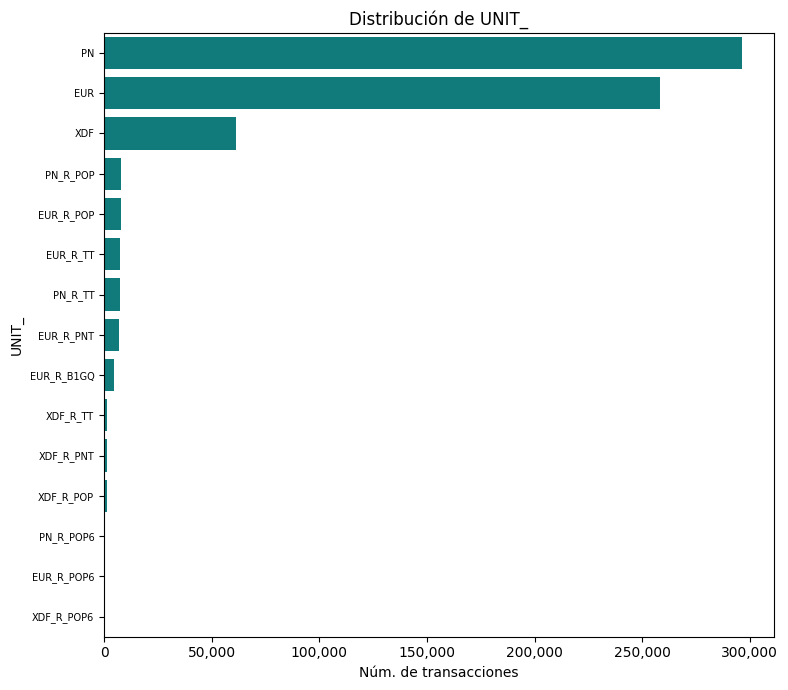

In [ ]:
# Gráfico de UNIT (orden descendente por frecuencia)
orden_unit = df['UNIT_'].value_counts().index

plt.figure(figsize=(8, 7))
sns.countplot(y='UNIT_', data=df, order=orden_unit, color='#008B8B')

plt.title('Distribución de UNIT_')
plt.xlabel('Núm. de transacciones')
plt.ylabel('UNIT_')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tick_params(axis='y', labelsize=7)
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **UNIT_** del dataset, que permite caracterizar el tipo de unidad o medida en la que se reporta una observación. Destacan los grupos PN (número puro o conteo), EUR y XDF (Divisa domestica) con un 44.75%, 39% y 9.22% respectivamente. Adicionalmente, se presentan ratios por total de habitantes, número de transacciones, toal de transacciones, entre otros, en menor proporción. Carece de sentido realizar comparaciones directas entre las distintas series, se debe realizar una transformación para que puedan trabajarse de forma equivalente.

### YEAR

Año en el que se procesó la transacción.

#### Tabla

In [ ]:
# Tabla de frecuencias de YEAR
tabla_country_year = (
    df['YEAR']
    .value_counts()
    .reset_index()
    .rename(columns={'YEAR': 'Categoria', 'count': 'Frecuencia'})
    .sort_values('Categoria')
)
tabla_country_year['Porcentaje'] = (tabla_country_year['Frecuencia'] / tabla_country_year['Frecuencia'].sum() * 100).round(2)

tabla_country_year

#### Gráfico

In [ ]:
# Gráfico de YEAR (orden descendente por frecuencia)
orden_year = df['YEAR'].value_counts().index

plt.figure(figsize=(8, 10))
sns.countplot(y='YEAR', data=df, order=orden_year, color='#008B8B')

plt.title('Distribución de YEAR')
plt.xlabel('Núm. de transacciones')
plt.ylabel('YEAR')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tick_params(axis='y', labelsize=6)
plt.tight_layout()
plt.show()

La tabla anterior describen la distribución de la variable **YEAR** del dataset, que permite caracterizar el destino año o periodo de tiempo en el que se procesaron las transacciones. A simple vista se nota que hay años representados solos, por trimestre o semestre. Es importante notar que estas divisiones no representan acumulados entre si, solo son categorías distintas de registro. Se nota progresivamente el incremento en movimientos bancarios desde el año 2000, destacandose el incremento exponencial a partir del año 2014. Los últimos 5 años han marcado records historicos en total de transacciones registradas.

### TYPE_AMOUNT

Presenta la clasificación del monto de la transacción (revisado, no validado, valor provisional, etc). Se categoriza de la siguiente forma:

**- A:** Valor normal.

**- Q** Valor faltante, suprimido.

**- M:** Valor faltante, dato no puede existir.

**- P** Valor temporal.

**- L** Valor faltante, dato existente pero no pudo ser recolectado.

**- E** Valor estimado

#### Tabla

In [ ]:
# Tabla de frecuencias de TYPE_AMOUNT
tabla_type_amount = (
    df['TYPE_AMOUNT']
    .value_counts()
    .reset_index()
    .rename(columns={'TYPE_AMOUNT': 'Categoria', 'count': 'Frecuencia'})
)
tabla_type_amount['Porcentaje'] = (tabla_type_amount['Frecuencia'] / tabla_type_amount['Frecuencia'].sum() * 100).round(2)

tabla_type_amount

#### Gráfico

In [ ]:
# Gráfico de TYPE_AMOUNT (orden descendente por frecuencia)
orden_amount = df['TYPE_AMOUNT'].value_counts().index

plt.figure(figsize=(8, 4))
sns.countplot(x='TYPE_AMOUNT', data=df, order=orden_amount, color='#008B8B')

plt.title('Distribución de TYPE_AMOUNT')
plt.xlabel('Tipo de monto')
plt.ylabel('Núm. de transacciones')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **TYPE_AMOUNT** del dataset, que permite caracterizar la validez del monto registrado en la columna AMOUNT. De forma general vemos que el 72.86% de las observaciones fueron clasificadas como A, es decir, el monto fue validado correctamente. Mientras que el 28% restante presentan un monto poco fiable que pudo haber sido suprimido, estimado, no recolectado, etc.

### DECIMALS

Indica la cantidad de decimales presentes en el monto.

#### Tabla

In [ ]:
# Tabla de frecuencias de DECIMALS
tabla_decimals_amount = (
    df['DECIMALS']
    .value_counts()
    .reset_index()
    .rename(columns={'DECIMALS': 'Categoria', 'count': 'Frecuencia'})
    .sort_values('Frecuencia', ascending=False)
)
tabla_decimals_amount['Porcentaje'] = (tabla_decimals_amount['Frecuencia'] / tabla_decimals_amount['Frecuencia'].sum() * 100).round(2)

tabla_decimals_amount

#### Gráfico

In [ ]:
# Gráfico de DECIMALS
sns.countplot(x='DECIMALS', data=df, color='#008B8B')

plt.title('Distribución de DECIMALS')
plt.xlabel('Decimales')
plt.ylabel('Núm. de transacciones')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **DECIMALS** del dataset, que permite caracterizar la cantidad de decimales en la columna AMOUNT. Resulta de utilidad pues será relacionada con la columna UNIT_MULT. Vemos que el 90.72% de los montos tienen 3 unidades decimales, frente al casi 10% restante que tiene 2.

### DESCRIPTION

Descripción de la transacción.

#### Tabla

In [ ]:
# Tabla de las 10 descripciones más frecuentes
tabla_description = (
    df['DESCRIPTION']
    .value_counts()
    .reset_index()
    .rename(columns={'DESCRIPTION': 'Categoria', 'count': 'Frecuencia'})
    .head(10)
)
tabla_description['Porcentaje'] = (tabla_description['Frecuencia'] / df.shape[0] * 100).round(2)

tabla_description

#### Gráfico

In [ ]:
# Gráfico de las 10 descripciones más frecuentes
top10_desc = df['DESCRIPTION'].value_counts().head(10).index
df_desc_top10 = df[df['DESCRIPTION'].isin(top10_desc)]

plt.figure(figsize=(9, 5))
sns.countplot(y='DESCRIPTION', data=df_desc_top10, order=top10_desc, color='#008B8B')

plt.title('Top 10 descripciones más frecuentes')
plt.xlabel('Núm. de transacciones')
plt.ylabel('DESCRIPTION')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tick_params(axis='y', labelsize=7)
plt.tight_layout()
plt.show()

Esta variable corresponde a un mensaje corto asociado a cada una de las transacciones, debido a la gran diversidad de entradas, solamente se mostrarán las más frecuentes como lo fueron "Card payments, sent", "Cheques, sent", "Credit transfers, sent", "Direct debits, sent" con más de 3000 apariciones.

### UNIT_MULT

Indica el multiplicador del monto de la transacción.

#### Tabla

In [ ]:
# Transformación de UNIT_MULT: 0 → 1 (equivalente al case_when de R)
df['UNIT_MULT'] = df['UNIT_MULT'].apply(
    lambda x: np.nan if pd.isna(x) else (1 if x == 0 else int(x))
)

tabla_mulp_amount = (
    df['UNIT_MULT']
    .value_counts(dropna=False)
    .reset_index()
    .rename(columns={'UNIT_MULT': 'Categoria', 'count': 'Frecuencia'})
    .sort_values('Frecuencia', ascending=False)
)
tabla_mulp_amount['Porcentaje'] = (tabla_mulp_amount['Frecuencia'] / tabla_mulp_amount['Frecuencia'].sum() * 100).round(2)

tabla_mulp_amount

#### Gráfico

In [ ]:
# Gráfico de UNIT_MULT
sns.countplot(x='UNIT_MULT', data=df, color='#008B8B')

plt.title('Distribución de UNIT_MULT')
plt.xlabel('Decimales')
plt.ylabel('Núm. de transacciones')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

La tabla y gráfico anteriores describen la distribución de la variable **UNIT_MULT** del dataset, que permite caracterizar el multiplicador aplicado a la columna AMOUNT. Vemos que el 90.72% de los montos representado por un multiplicador de 6, es decir, millones, frente al casi 10% agrupado por 0, asociado a unidades.

## Variables Características Numéricas

### AMOUNT

#### Tabla

In [ ]:
# Cálculo del monto real (AMOUNT * 10^(UNIT_MULT - DECIMALS))
tabla_monto = df[['COUNTRY_ORIGIN', 'AMOUNT', 'UNIT_MULT', 'DECIMALS', 'TYPE_AMOUNT', 'UNIT_']].copy()
tabla_monto['monto_real'] = tabla_monto['AMOUNT'] * (10.0 ** (tabla_monto['UNIT_MULT'] - tabla_monto['DECIMALS']))

tabla_monto.head(15)

,COUNTRY_ORIGIN,AMOUNT,UNIT_MULT,DECIMALS,TYPE_AMOUNT,UNIT_,monto_real
0,AT,0.242000,6,3,A,PN,242.000
1,AT,0.268000,6,3,A,PN,268.000
2,AT,0.689000,6,3,A,PN,689.000
3,AT,0.632000,6,3,A,PN,632.000
4,AT,0.615000,6,3,A,PN,615.000
5,AT,1.467000,6,3,A,PN,1467.000
6,AT,1.311000,6,3,A,PN,1311.000
7,AT,0.863000,6,3,A,PN,863.000
8,AT,1.568711,6,3,A,PN,1568.711
9,AT,1.754513,6,3,A,PN,1754.513


Como se ilustró anteriormente, los distintos tipos de unidad hacen que sea necesario dividir el análisis de esta variable en 3 categorías principales: PN, EUR y XDF

##### PN

In [ ]:
# Filtro por UNIT_ == 'PN'
tabla_monto_normal = tabla_monto[tabla_monto['UNIT_'] == 'PN'].copy()

tabla_monto_normal.head()

,COUNTRY_ORIGIN,AMOUNT,UNIT_MULT,DECIMALS,TYPE_AMOUNT,UNIT_,monto_real
0,AT,0.242,6,3,A,PN,242.0
1,AT,0.268,6,3,A,PN,268.0
2,AT,0.689,6,3,A,PN,689.0
3,AT,0.632,6,3,A,PN,632.0
4,AT,0.615,6,3,A,PN,615.0


In [ ]:
# Estadísticas descriptivas para PN
col = tabla_monto_normal['monto_real']
pd.DataFrame([{
    'n':          len(col),
    'n_missing':  col.isna().sum(),
    'pct_missing': round(col.isna().sum() / len(col) * 100, 2),
    'media':      col.mean(),
    'ds':         col.std(),
    'mediana':    col.median(),
    'minimo':     col.min(),
    'maximo':     col.max(),
    'Q1':         col.quantile(0.25),
    'Q3':         col.quantile(0.75),
    'IQR':        col.quantile(0.75) - col.quantile(0.25)
}])

,n,n_missing,pct_missing,media,ds,mediana,minimo,maximo,Q1,Q3,IQR
0,296348,66013,22.28,184654.224517,2.786865e+06,20.473,-1.0,2.077016e+08,0.0,1247.0385,1247.0385


La variable AMOUNT filtrada por PN fue analizada a partir de 296.348 observaciones. El total de datos faltantes corresponde a 66.013 observaciones, aproximadamente un 22% del total. Se obtuvo un promedio de 184.654 pn con una desviación estándar de 2.786.927, donde el 50% de los totales está por debajo de 20. El valor minimo fue aproximadamente de -10 y el máximo fue de 207.701.558 pn. El 25% de los datos son inferiores a 0 y el 75% menores a 1248. Como se ve, se encuentra un porcentaje llamativo de datos negativos, probablemente relacionados a saldos pendientes o deudas.

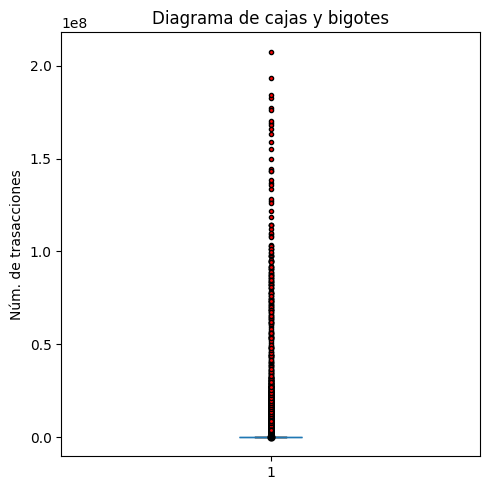

In [ ]:
# Diagrama de cajas y bigotes para PN
fig, ax = plt.subplots(figsize=(5, 5))

datos_validos = tabla_monto_normal['monto_real'].dropna()
ax.boxplot(datos_validos, patch_artist=True,
           boxprops=dict(facecolor='#a6cee3', color='#1f78b4'),
           medianprops=dict(color='#1f78b4'),
           flierprops=dict(markerfacecolor='red', marker='o', markersize=3))

# Punto de la media
ax.plot(1, datos_validos.mean(), marker='o', color='black', markersize=5, zorder=5)

plt.title('Diagrama de cajas y bigotes')
plt.xlabel('')
plt.ylabel('Núm. de trasacciones')
plt.tight_layout()
plt.show()

La distibución de AMOUNT para el tipo PN es altamente asimetrica, con fuerte concentración de valores bajos y una cantidad significativa de valores extremos altos. Esto indica que aunque la mayoría de las transacciones tienen totales moderados, existen algunas con totales excepcionalmente altos que influyen notablemente en los estadísticos como la media y la desviación estándar.

##### EUR

In [ ]:
# Filtro por UNIT_ == 'EUR'
tabla_monto_eur = tabla_monto[tabla_monto['UNIT_'] == 'EUR'].copy()

tabla_monto_eur.head()

,COUNTRY_ORIGIN,AMOUNT,UNIT_MULT,DECIMALS,TYPE_AMOUNT,UNIT_,monto_real
11,AT,5008.499,6,3,A,EUR,5008499.0
12,AT,6501.324,6,3,A,EUR,6501324.0
13,AT,6017.686,6,3,A,EUR,6017686.0
14,AT,6412.088,6,3,A,EUR,6412088.0
15,AT,6749.347,6,3,A,EUR,6749347.0


In [ ]:
# Estadísticas descriptivas para EUR
col = tabla_monto_eur['monto_real']
pd.DataFrame([{
    'n':          len(col),
    'n_missing':  col.isna().sum(),
    'pct_missing': round(col.isna().sum() / len(col) * 100, 2),
    'media':      col.mean(),
    'ds':         col.std(),
    'mediana':    col.median(),
    'minimo':     col.min(),
    'maximo':     col.max(),
    'Q1':         col.quantile(0.25),
    'Q3':         col.quantile(0.75),
    'IQR':        col.quantile(0.75) - col.quantile(0.25)
}])

,n,n_missing,pct_missing,media,ds,mediana,minimo,maximo,Q1,Q3,IQR
0,258391,55972,21.66,3.534435e+08,5.407405e+09,27290.4435,-1.0,2.634231e+11,2.784365,1.655635e+06,1.655632e+06


La variable AMOUNT filtrada por EUR fue analizada a partir de 258.391 observaciones. El total de datos faltantes corresponde a 55.972 observaciones, aproximadamente un 22% del total. Se obtuvo un promedio de 353.443.535 euros con una desviación estándar de 5.407.405.070, donde el 50% de los montos está por debajo de 27.290.83 euros. El valor minimo fue aproximadamente de -10 y el máximo fue de 263.423.125.212 euros El 25% de los datos son inferiores a 3.68 euros y el 75% menores a 1.656.369 Como se ve, se encuentra un porcentaje llamativo de datos negativos, probablemente relacionados a saldos pendientes o deudas.

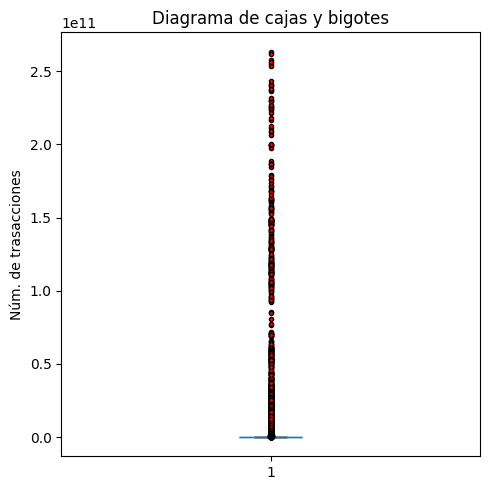

In [ ]:
# Diagrama de cajas y bigotes para EUR
fig, ax = plt.subplots(figsize=(5, 5))

datos_validos = tabla_monto_eur['monto_real'].dropna()
ax.boxplot(datos_validos, patch_artist=True,
           boxprops=dict(facecolor='#a6cee3', color='#1f78b4'),
           medianprops=dict(color='#1f78b4'),
           flierprops=dict(markerfacecolor='red', marker='o', markersize=3))

ax.plot(1, datos_validos.mean(), marker='o', color='black', markersize=5, zorder=5)

plt.title('Diagrama de cajas y bigotes')
plt.xlabel('')
plt.ylabel('Núm. de trasacciones')
plt.tight_layout()
plt.show()

##### XDF

In [ ]:
# Filtro por UNIT == 'XDF'
tabla_monto_xdf = tabla_monto[tabla_monto['UNIT_'] == 'XDF'].copy()

tabla_monto_xdf.head()

,COUNTRY_ORIGIN,AMOUNT,UNIT_MULT,DECIMALS,TYPE_AMOUNT,UNIT_,monto_real
67,BG,NaN,6,3,Q,XDF,NaN
68,BG,72.045372,6,3,A,XDF,7.204537e+04
88,BG,2880.031092,6,3,A,XDF,2.880031e+06
89,BG,966.633450,6,3,A,XDF,9.666334e+05
90,BG,987.898952,6,3,A,XDF,9.878990e+05


In [ ]:
# Estadísticas descriptivas para XDF
col = tabla_monto_xdf['monto_real']
pd.DataFrame([{
    'n':          len(col),
    'n_missing':  col.isna().sum(),
    'pct_missing': round(col.isna().sum() / len(col) * 100, 2),
    'media':      col.mean(),
    'ds':         col.std(),
    'mediana':    col.median(),
    'minimo':     col.min(),
    'maximo':     col.max(),
    'Q1':         col.quantile(0.25),
    'Q3':         col.quantile(0.75),
    'IQR':        col.quantile(0.75) - col.quantile(0.25)
}])

,n,n_missing,pct_missing,media,ds,mediana,minimo,maximo,Q1,Q3,IQR
0,61103,17562,28.74,5.685471e+09,7.517678e+10,38552.0,-1.0,2.950583e+12,0.0,9495258.0,9495258.0


La variable AMOUNT filtrada por EUR fue analizada a partir de 61.103 observaciones. El total de datos faltantes corresponde a 17.562 observaciones, aproximadamente un 29% del total. Se obtuvo un promedio de 5.685.471.097 XDF con una desviación estándar de 75.176.776.461, donde el 50% de los montos está por debajo de 38.552 XDF. El valor minimo fue aproximadamente de -10 y el máximo fue de 2.950583e+12 XDF. El 25% de los datos son inferiores a 0 XDF y el 75% menores a 9.495.258 XDF. Como se ve, se encuentra un porcentaje llamativo de datos negativos, probablemente relacionados a saldos pendientes o deudas.

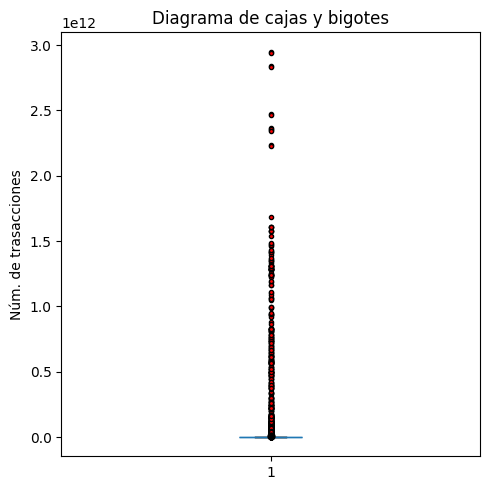

In [ ]:
# Diagrama de cajas y bigotes para XDF
# Nota: el código R original usaba tabla_monto_eur por error; aquí se usa tabla_monto_xdf correctamente
fig, ax = plt.subplots(figsize=(5, 5))

datos_validos = tabla_monto_xdf['monto_real'].dropna()
ax.boxplot(datos_validos, patch_artist=True,
           boxprops=dict(facecolor='#a6cee3', color='#1f78b4'),
           medianprops=dict(color='#1f78b4'),
           flierprops=dict(markerfacecolor='red', marker='o', markersize=3))

ax.plot(1, datos_validos.mean(), marker='o', color='black', markersize=5, zorder=5)

plt.title('Diagrama de cajas y bigotes')
plt.xlabel('')
plt.ylabel('Núm. de trasacciones')
plt.tight_layout()
plt.show()

La distibución de AMOUNT para el tipo XDF es altamente asimetrica, con fuerte concentración de valores bajos y una cantidad significativa de valores extremos altos. Esto indica que aunque la mayoría de las transacciones tienen totales moderados, existen algunas con totales excepcionalmente altos que influyen notablemente en los estadísticos como la media y la desviación estándar.